# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [ ]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [ ]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape


In [ ]:
# 3. Inspect / remove nulls and duplicates


In [ ]:
# 4. Find class balances, print out how many of each topic_category there are.


```py
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
# Import our data
df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)
df.head()
```
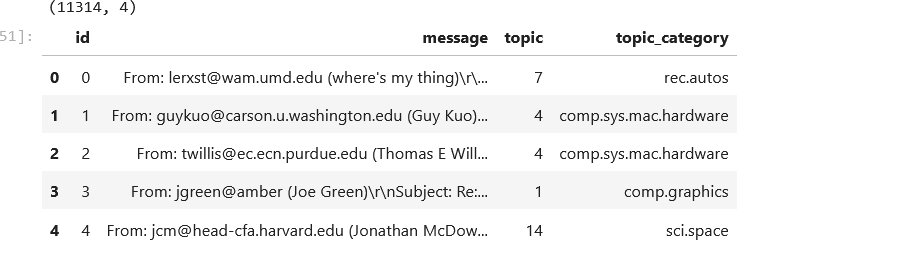

```py
# 3. Inspect / remove nulls and duplicates
print(df.isnull().sum())
print("Duplicated")
print(df.duplicated().sum())
```

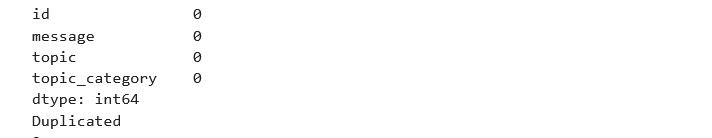


```py
# 4. Find class balances, print out how many of each topic_category there are.

df.topic_category.value_counts()

```

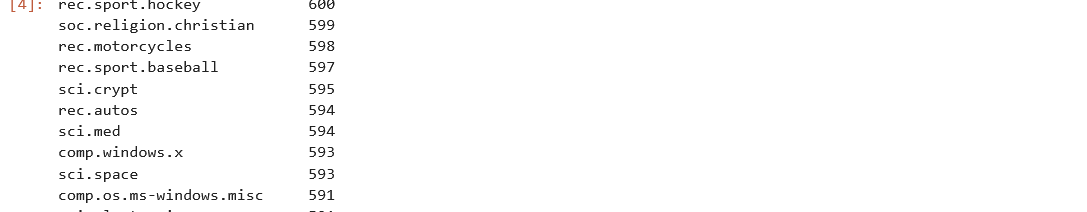


# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [ ]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'


In [ ]:
# 2. Make a function that removes all punctuation. 


test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'


In [ ]:
# 3. Make a function that removes all stopwords.

test_string = 'This is a sentence! With some different stopwords i have added in here.'


In [ ]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'



In [ ]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.


test_string = 'I played and started playing with players and we all love to play with plays'


In [ ]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 


```py
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'


# Lowercase all words
def make_lower(a_string):
    return a_string.lower()

make_lower(test_string)

```

```py
# 2. Make a function that removes all punctuation. 


test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'



def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string


# a_sentence = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punctuation(test_string)


```


```py
# 3. Make a function that removes all stopwords.

test_string = 'This is a sentence! With some different stopwords i have added in here.'

# Remove all stopwords

def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string
            
# a_sentence = 'This is a sentence! With some different stopwords i have added in here.'
remove_stopwords(test_string)

```


```py
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'


```


```py
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.


test_string = 'I played and started playing with players and we all love to play with plays'


def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    #input_string = lem_with_pos_tag(input_string)
    input_string = remove_stopwords(input_string)    
    return input_string


# df['message_clean'] = df['message']
text_pipeline(test_string)

# df['message_clean'] = df['message_clean'].apply(make_lower)
# df['message_clean'] = df['message_clean'].apply(remove_punctuation)
# df['message_clean'] = df['message_clean'].apply(lem_with_pos_tag)
# df['message_clean'] = df['message_clean'].apply(remove_stopwords)


```


```py
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 


# df = {'message': test_string}
df['message_clean'] = df['message'].apply(text_pipeline)


print("ORIGINAL TEXT:", df['message'][0])
print("CLEANDED TEXT:", df['message_clean'][0])
```

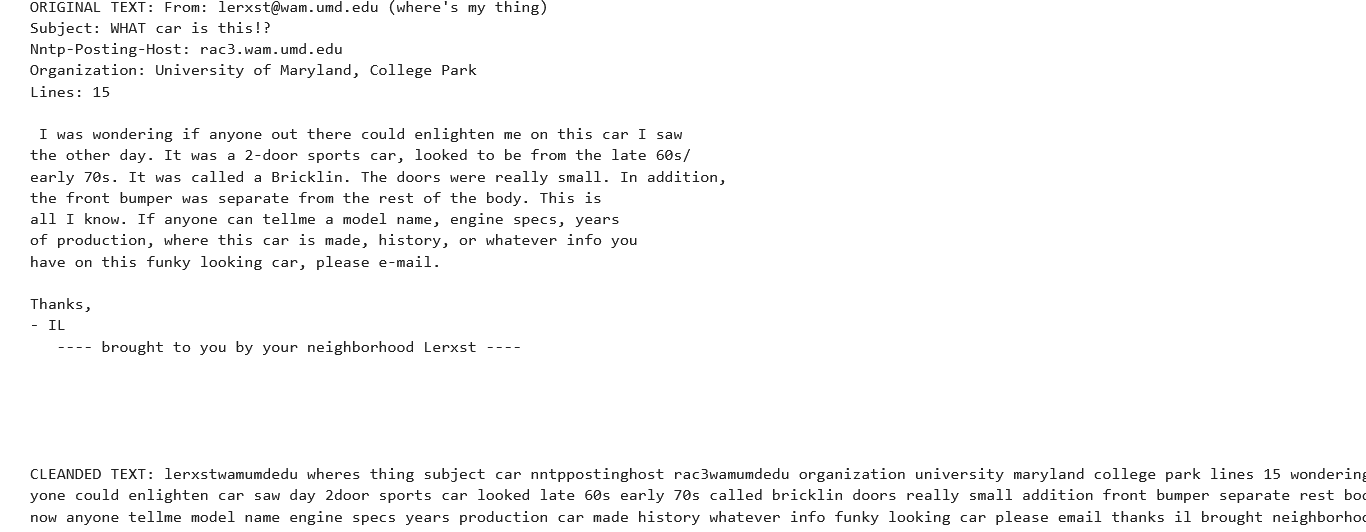


# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [ ]:
# 1. Define your `X` and `y` data. 



In [ ]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).



In [ ]:
# 3. Fit your vectorizer using your X data



In [ ]:
# 4. Transform your X data using your fitted vectorizer. 



In [ ]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?



```py
# 1. Define your `X` and `y` data. 

X = df['message_clean'].values

y = df['topic_category'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train_text = X_train
X_test_text = X_test

```


```py
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
# from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize our vectorizer
vectorizer = TfidfVectorizer()


```


```py
# 3. Fit your vectorizer using your X data

# This makes your vocab matrix
vectorizer.fit(X_train)


```



# Split your data into Training and Testing data. 

In [ ]:
# Split our data into testing and training like always. 


```py
# Split our data into testing and training like always. 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train_text = X_train
X_test_text = X_test
```

```py
# 4. Transform your X data using your fitted vectorizer. 


# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


```


```py
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print(X_train.shape, type(X))

```


___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [ ]:
# 1. Initalize an empty model. 




In [ ]:
# Fit our model with our training data.




```py
# 1. Initalize an empty model. 

# Initalize our model.

model = MultinomialNB(alpha=.05)
```

```py
# Fit our model with our training data.
model.fit(X_train, y_train)
```


# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [ ]:
# 1. Make new predictions of our testing data. 




In [ ]:
# 2. Print the accuracy of the model. 
accuracy = ???

print("Model Accuracy: %f" % accuracy)

In [ ]:
# 3. Plot the confusion matrix of our predictions



In [ ]:
# 4. Using `classification_report` print the evaluation results for all the classes. 



```py
# 1. Make new predictions of our testing data. 


# Make new predictions of our testing data. 
y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

y_pred_proba
```

```py

# Evaluate our model
accuracy =  model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)
```


```py
# 3. Plot the confusion matrix of our predictions

fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp
```
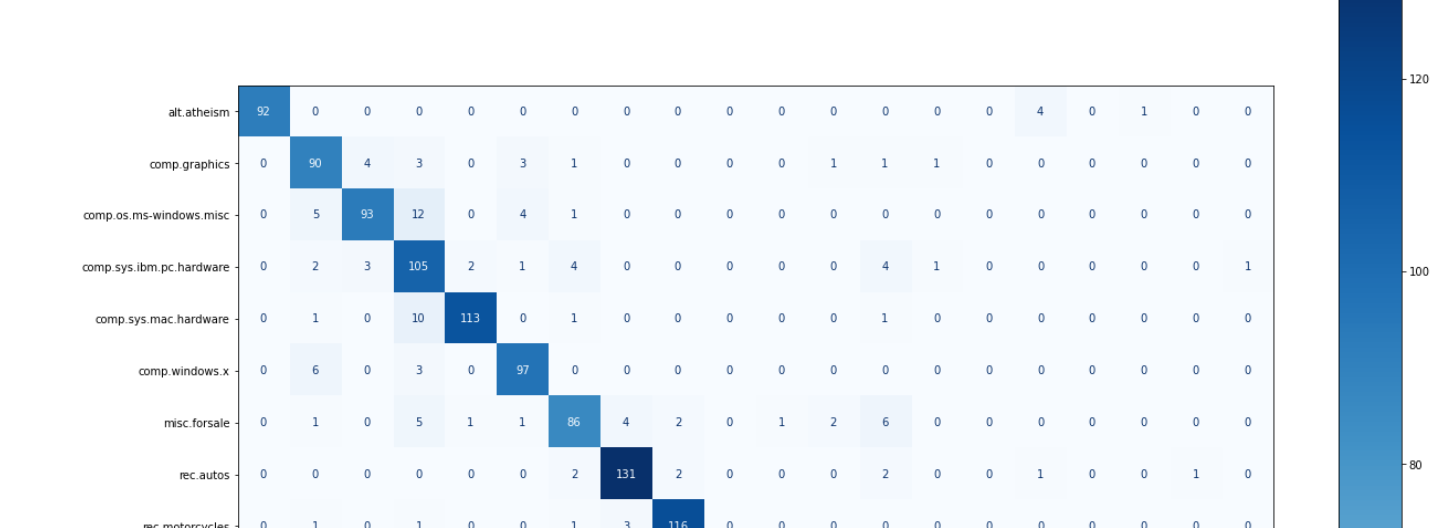


```py
# 4. Using `classification_report` print the evaluation results for all the classes. 
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))
```

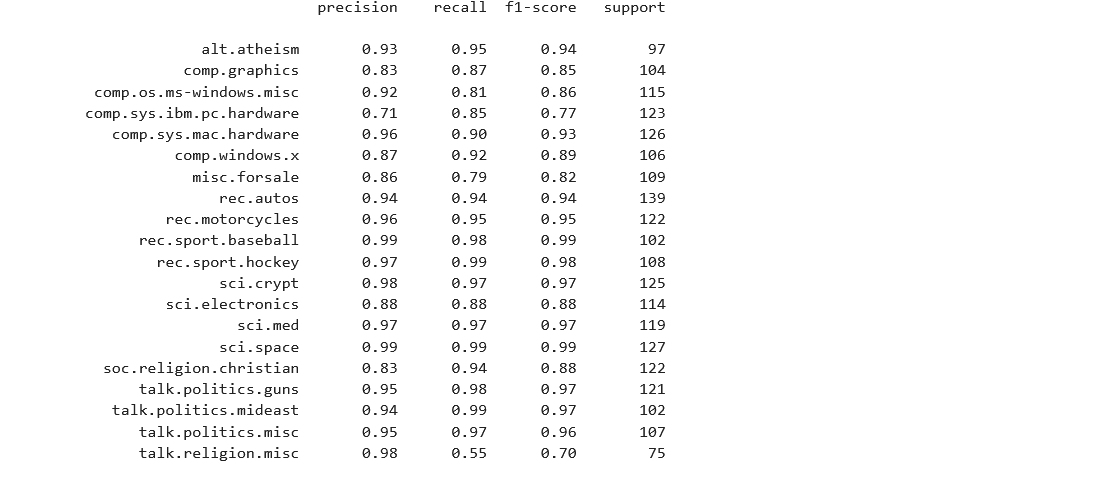


# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [ ]:
my_sentence = ???

# 1. Apply the text pipeline to your sentence

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\

# 3. Use the model to predict your new `X`. 

# 4. Print the prediction


```py

my_sentence = "Is this strange"

# 1. Apply the text pipeline to your sentence
new_text = text_pipeline(my_sentence)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([new_text])

# 3. Use the model to predict your new `X`. 
model.predict(X)

# 4. Print the prediction
pp = model.predict_proba(X)
for class_name, percentage in zip(model.classes_, pp.round(3)[0]):
    print(class_name, percentage )


```

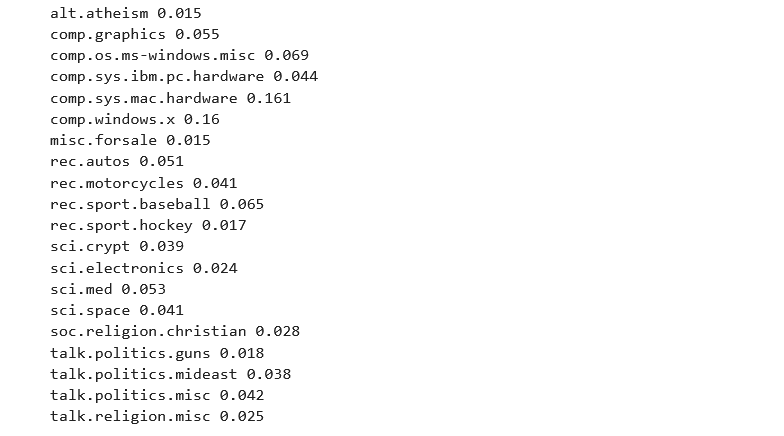


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [ ]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')




```py
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')

df.head()

```

```py
df["Tweet_pipeline"] = df["Tweet"].apply(text_pipeline)
X = df['Tweet_pipeline'].values

y = df['Party'].values
    
```


```py
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# This makes your vocab matrix
vectorizer.fit(X_train)


# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
```


```py
# Initalize our model.
model = MultinomialNB(alpha=.90)


# Fit our model with our training data.
model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

# Evaluate our model
accuracy =  model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)
```

